<a href="https://colab.research.google.com/github/mahdiya-io/Genomics-of-Drug-Sensitivity-in-Cancer/blob/main/preprocessing_%2B_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split

In [ ]:
gdsc_data = pd.read_csv("GDSC_DATASET.csv")

In [ ]:
gdsc_data_raw = pd.read_csv("GDSC_DATASET.csv")

In [ ]:
gdsc_data_raw.head()

,COSMIC_ID,CELL_LINE_NAME,TCGA_DESC,DRUG_ID,DRUG_NAME,LN_IC50,AUC,Z_SCORE,GDSC Tissue descriptor 1,GDSC Tissue descriptor 2,Cancer Type (matching TCGA label),Microsatellite instability Status (MSI),Screen Medium,Growth Properties,CNA,Gene Expression,Methylation,TARGET,TARGET_PATHWAY
0,683667,PFSK-1,MB,1003,Camptothecin,-1.463887,0.930220,0.433123,nervous_system,medulloblastoma,MB,MSS/MSI-L,R,Adherent,Y,Y,Y,TOP1,DNA replication
1,684057,ES5,UNCLASSIFIED,1003,Camptothecin,-3.360586,0.791072,-0.599569,bone,ewings_sarcoma,NaN,MSS/MSI-L,R,Adherent,Y,Y,Y,TOP1,DNA replication
2,684059,ES7,UNCLASSIFIED,1003,Camptothecin,-5.044940,0.592660,-1.516647,bone,ewings_sarcoma,NaN,MSS/MSI-L,R,Adherent,Y,Y,Y,TOP1,DNA replication
3,684062,EW-11,UNCLASSIFIED,1003,Camptothecin,-3.741991,0.734047,-0.807232,bone,ewings_sarcoma,NaN,MSS/MSI-L,R,Adherent,Y,Y,Y,TOP1,DNA replication
4,684072,SK-ES-1,UNCLASSIFIED,1003,Camptothecin,-5.142961,0.582439,-1.570016,bone,ewings_sarcoma,NaN,MSS/MSI-L,R,Semi-Adherent,Y,Y,Y,TOP1,DNA replication


In [ ]:
gdsc_data_raw.shape

(242035, 19)

In [ ]:
np.sum(gdsc_data_raw.isnull())

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


,0
COSMIC_ID,0
CELL_LINE_NAME,0
TCGA_DESC,1067
DRUG_ID,0
DRUG_NAME,0
LN_IC50,0
AUC,0
Z_SCORE,0
GDSC Tissue descriptor 1,9366
GDSC Tissue descriptor 2,9366


In [ ]:
# Screen Medium
gdsc_data['Screen Medium'].fillna(gdsc_data['Screen Medium'].mode, inplace=True)

In [ ]:
gdsc_data.dropna(axis=0, inplace=True)

In [ ]:
gdsc_data.shape

(166644, 19)

In [ ]:
np.sum(gdsc_data.isnull())

,0
COSMIC_ID,0
CELL_LINE_NAME,0
TCGA_DESC,0
DRUG_ID,0
DRUG_NAME,0
LN_IC50,0
AUC,0
Z_SCORE,0
GDSC Tissue descriptor 1,0
GDSC Tissue descriptor 2,0


In [ ]:
# number of duplicates
np.sum(gdsc_data.duplicated())

0

In [ ]:
gdsc_data.drop(gdsc_data[gdsc_data['Cancer Type (matching TCGA label)'] == "UNABLE TO CLASSIFY"].index, inplace=True)

In [ ]:
gdsc_data.drop(gdsc_data[gdsc_data['TARGET_PATHWAY'] == "Unclassified"].index, inplace=True)

In [ ]:
dropped_columns = ['LN_IC50', 'COSMIC_ID']
X = gdsc_data.drop(columns=dropped_columns, axis=1)

In [ ]:
y = gdsc_data['LN_IC50']

In [ ]:
print(X.shape)
print(y.shape)

(163230, 17)
(163230,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(122422, 17)
(122422,)
(40808, 17)
(40808,)


In [ ]:
X_train[['TCGA_DESC', 'GDSC Tissue descriptor 1', 'GDSC Tissue descriptor 2', 'Cancer Type (matching TCGA label)']].describe()

,TCGA_DESC,GDSC Tissue descriptor 1,GDSC Tissue descriptor 2,Cancer Type (matching TCGA label)
count,122422,122422,122422,122422
unique,30,17,33,30
top,LUAD,urogenital_system,lung_NSCLC_adenocarcinoma,LUAD
freq,9992,13453,9992,9992


In [ ]:
print(X_train['DRUG_ID'].nunique())
print(X_train['DRUG_NAME'].nunique())
# result is they are not the same

256
248


In [ ]:
X_train[['Microsatellite instability Status (MSI)', 'CNA', 'Gene Expression', 'Methylation']].describe()

,Microsatellite instability Status (MSI),CNA,Gene Expression,Methylation
count,122422,122422,122422,122422
unique,2,2,2,2
top,MSS/MSI-L,Y,Y,Y
freq,113894,121928,119673,119800


In [ ]:
X_train[['DRUG_NAME', "TARGET", "TARGET_PATHWAY"]].describe()

,DRUG_NAME,TARGET,TARGET_PATHWAY
count,122422,122422,122422
unique,248,184,23
top,Ulixertinib,"PARP1, PARP2",PI3K/MTOR signaling
freq,965,2678,12967


comparison to AUC

<Axes: xlabel='AUC', ylabel='TCGA_DESC'>

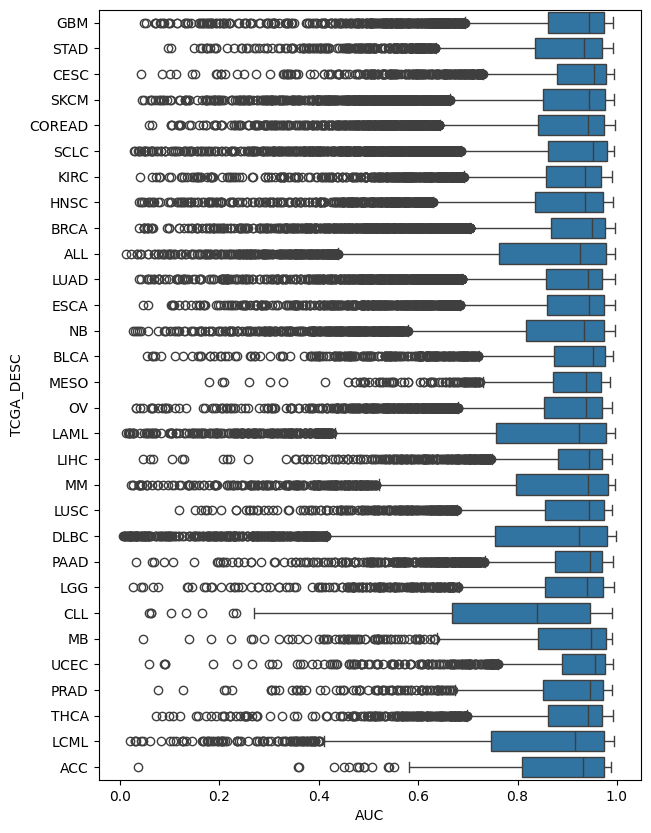

In [ ]:
plt.figure(figsize=(7, 10))
sns.boxplot(x = X_train['AUC'], y = X_train['TCGA_DESC'])

<Axes: xlabel='AUC', ylabel='GDSC Tissue descriptor 1'>

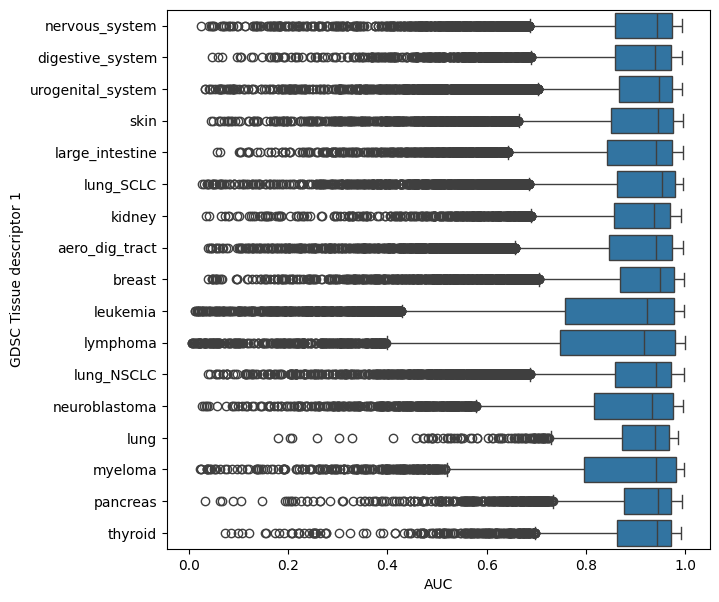

In [ ]:
plt.figure(figsize=(7, 7))
sns.boxplot(x = X_train['AUC'], y = X_train['GDSC Tissue descriptor 1'])

<Axes: xlabel='AUC', ylabel='GDSC Tissue descriptor 2'>

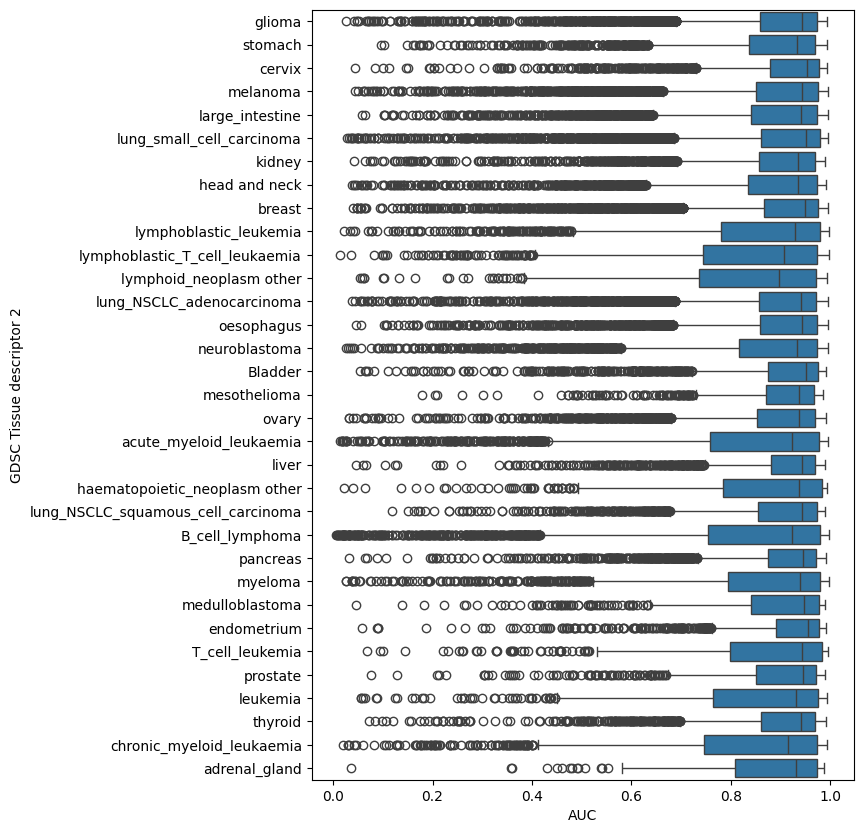

In [ ]:
plt.figure(figsize=(7, 10))
sns.boxplot(x = X_train['AUC'], y = X_train['GDSC Tissue descriptor 2'])

<Axes: xlabel='AUC', ylabel='Microsatellite instability Status (MSI)'>

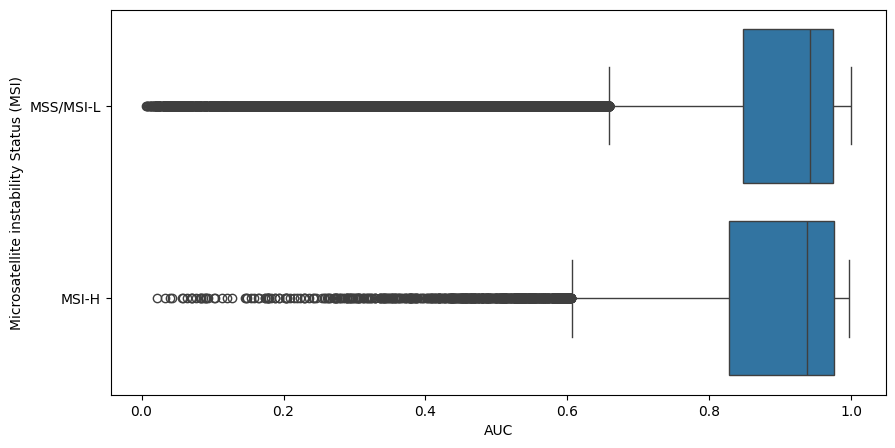

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x = X_train['AUC'], y = X_train['Microsatellite instability Status (MSI)'])

<Axes: xlabel='AUC', ylabel='Screen Medium'>

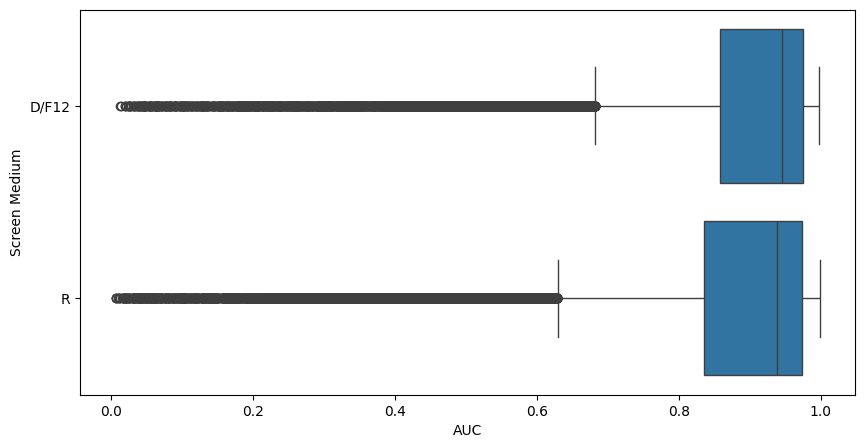

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x = X_train['AUC'], y = X_train['Screen Medium'])

<Axes: xlabel='AUC', ylabel='Growth Properties'>

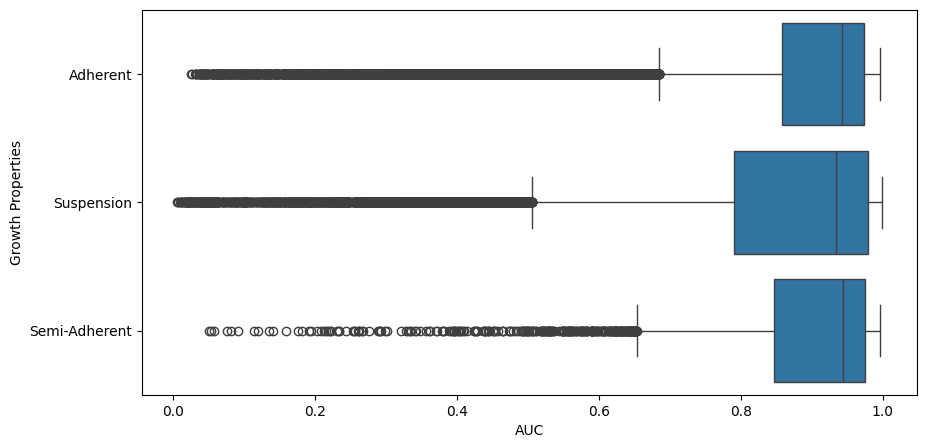

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x = X_train['AUC'], y = X_train['Growth Properties'])

<Axes: xlabel='AUC', ylabel='CNA'>

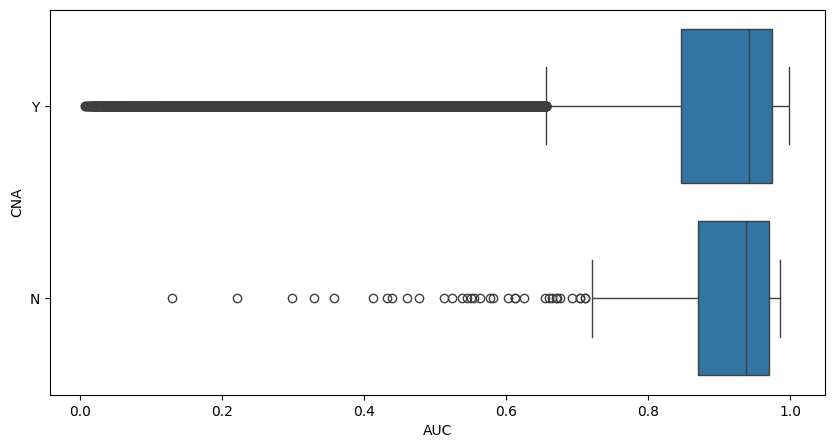

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x = X_train['AUC'], y = X_train['CNA'])

<Axes: xlabel='AUC', ylabel='Gene Expression'>

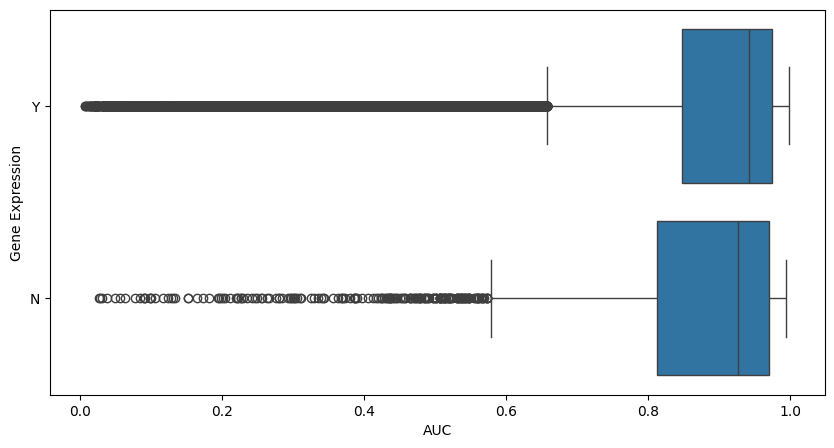

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x = X_train['AUC'], y = X_train['Gene Expression'])

<Axes: xlabel='AUC', ylabel='Methylation'>

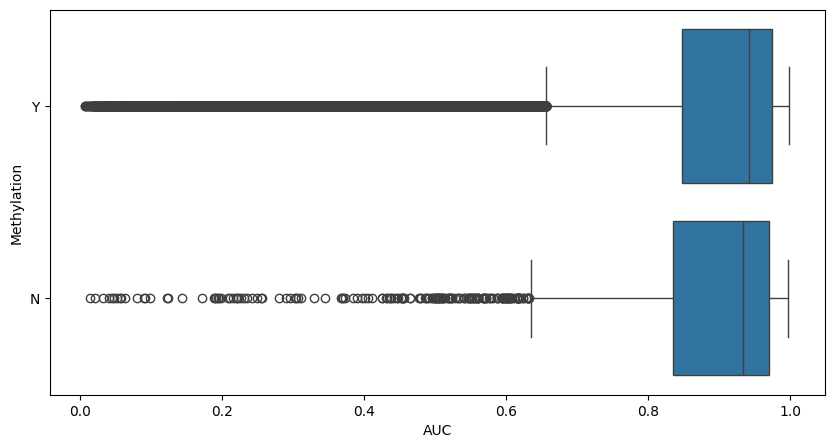

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x = X_train['AUC'], y = X_train['Methylation'])

<Axes: xlabel='AUC', ylabel='DRUG_NAME'>

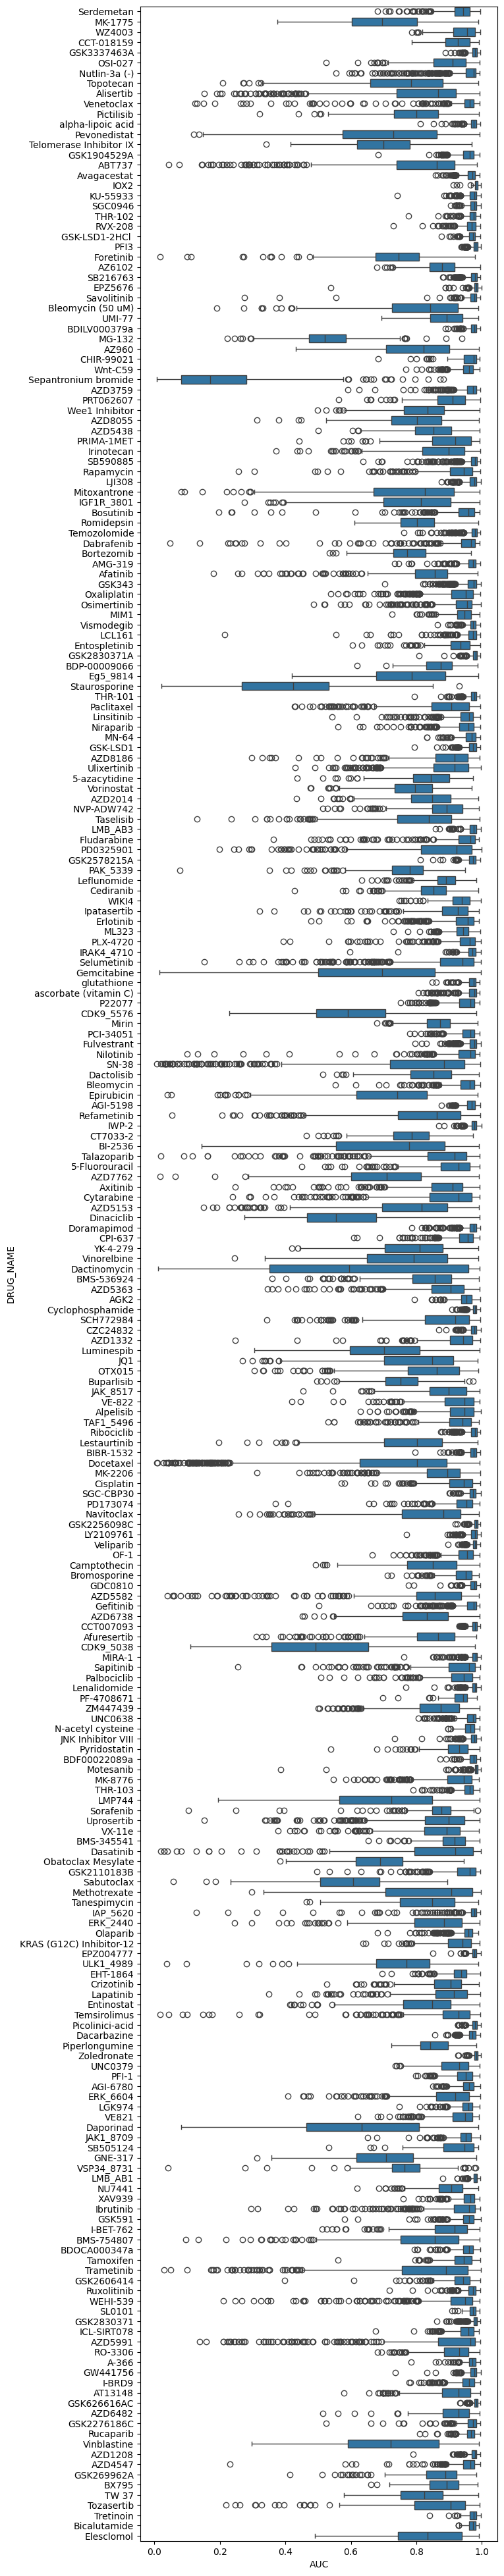

In [ ]:
plt.figure(figsize=(7, 50))
sns.boxplot(x = X_train['AUC'], y = X_train['DRUG_NAME'])

<Axes: xlabel='AUC', ylabel='TARGET'>

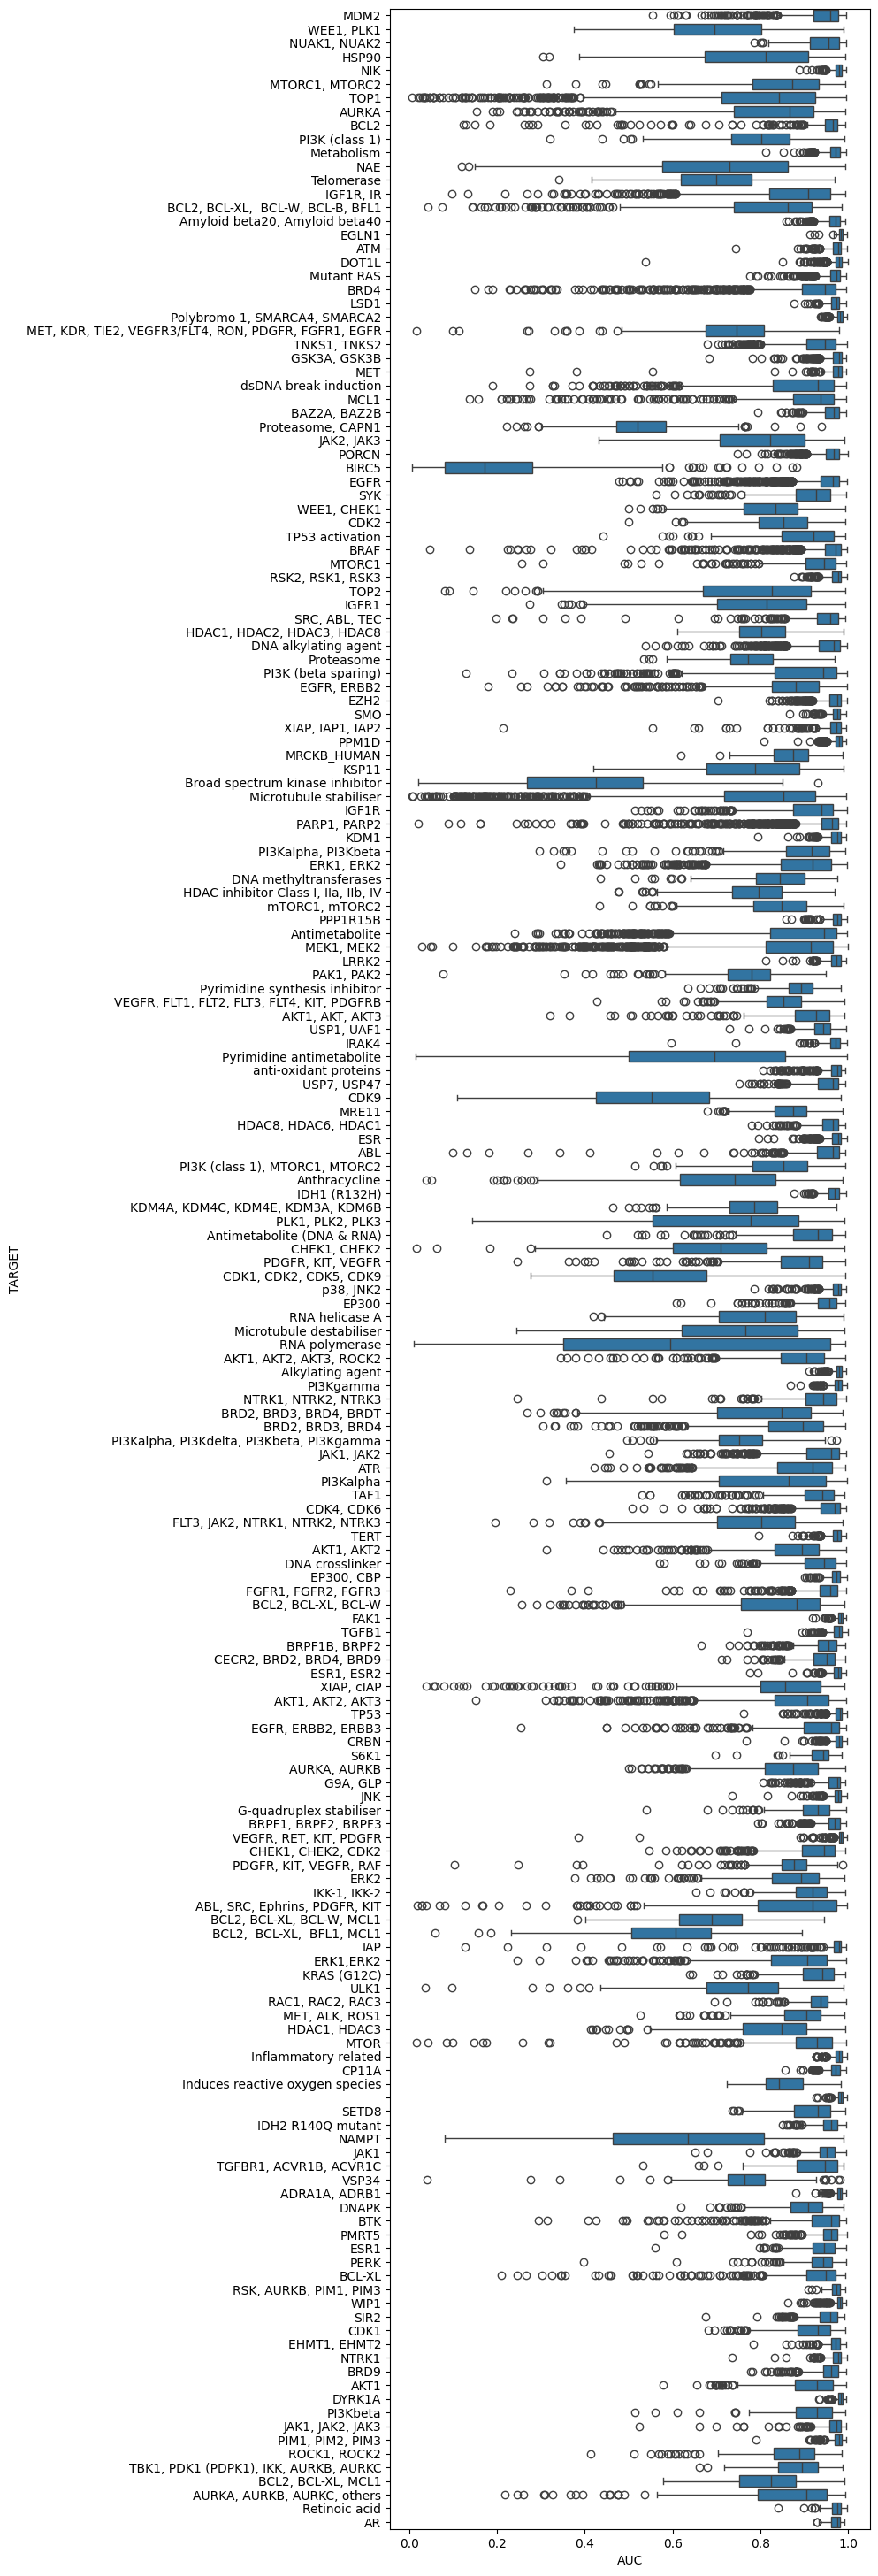

In [ ]:
plt.figure(figsize=(7, 37))
sns.boxplot(x = X_train['AUC'], y = X_train['TARGET'])

<Axes: xlabel='AUC', ylabel='TARGET_PATHWAY'>

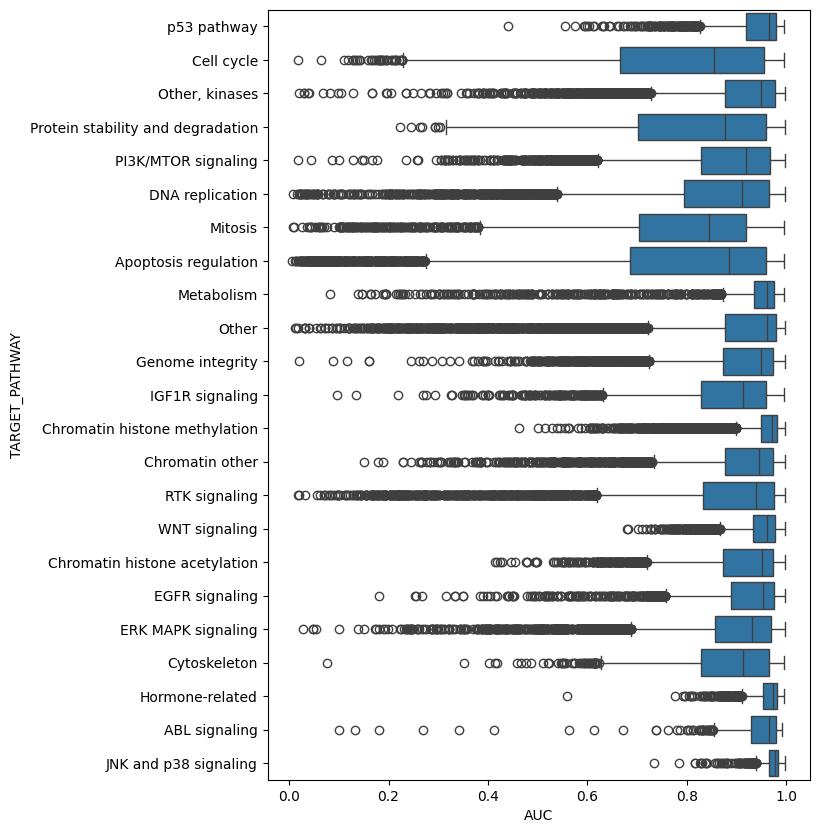

In [ ]:
plt.figure(figsize=(7, 10))
sns.boxplot(x = X_train['AUC'], y = X_train['TARGET_PATHWAY'])

comparison to IC50

<Axes: xlabel='LN_IC50', ylabel='Count'>

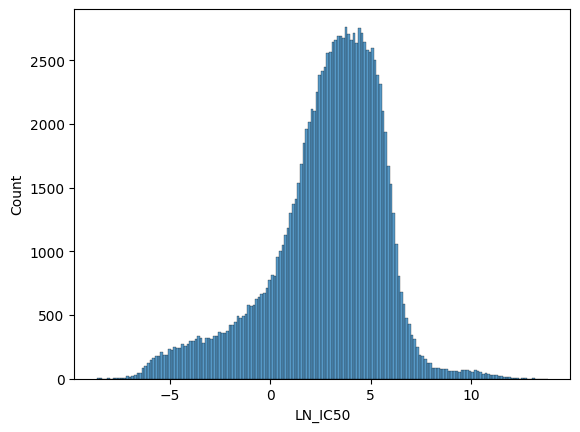

In [ ]:
sns.histplot(y_train)

<Axes: xlabel='LN_IC50', ylabel='TCGA_DESC'>

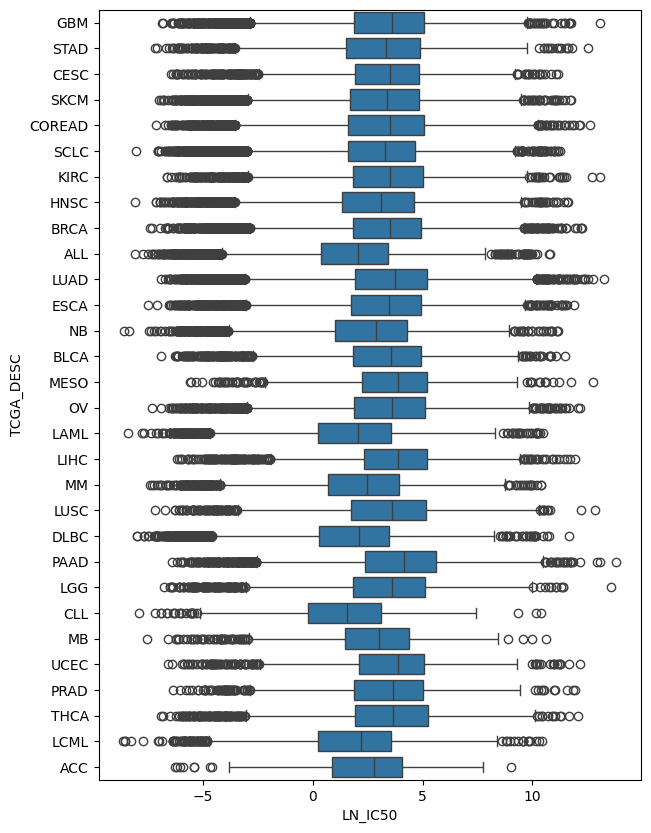

In [ ]:
plt.figure(figsize=(7, 10))
sns.boxplot(x = y_train, y = X_train['TCGA_DESC'])

<Axes: xlabel='LN_IC50', ylabel='GDSC Tissue descriptor 1'>

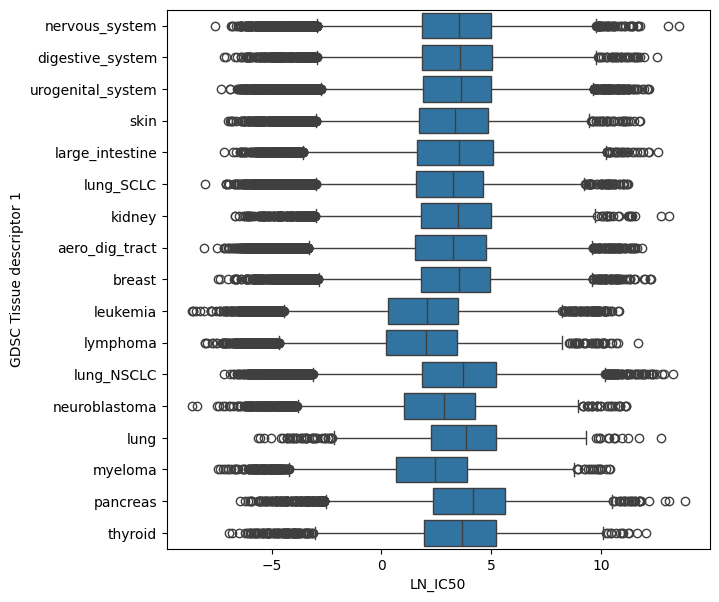

In [ ]:
plt.figure(figsize=(7, 7))
sns.boxplot(x = y_train, y = X_train['GDSC Tissue descriptor 1'])

<Axes: xlabel='LN_IC50', ylabel='GDSC Tissue descriptor 2'>

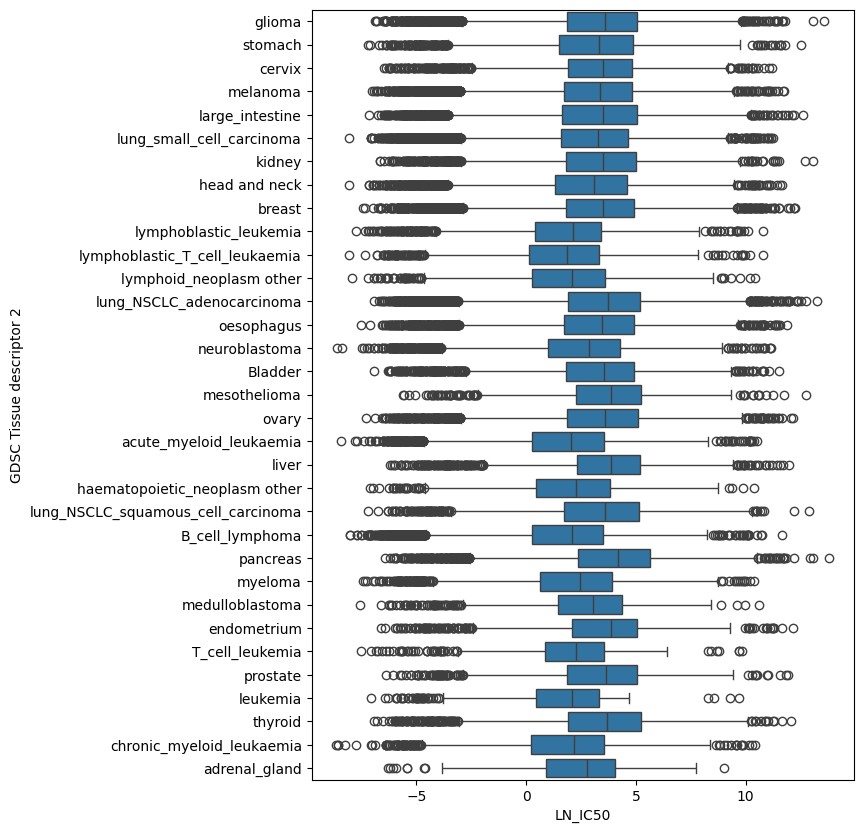

In [ ]:
plt.figure(figsize=(7, 10))
sns.boxplot(x = y_train, y = X_train['GDSC Tissue descriptor 2'])

<Axes: xlabel='LN_IC50', ylabel='Microsatellite instability Status (MSI)'>

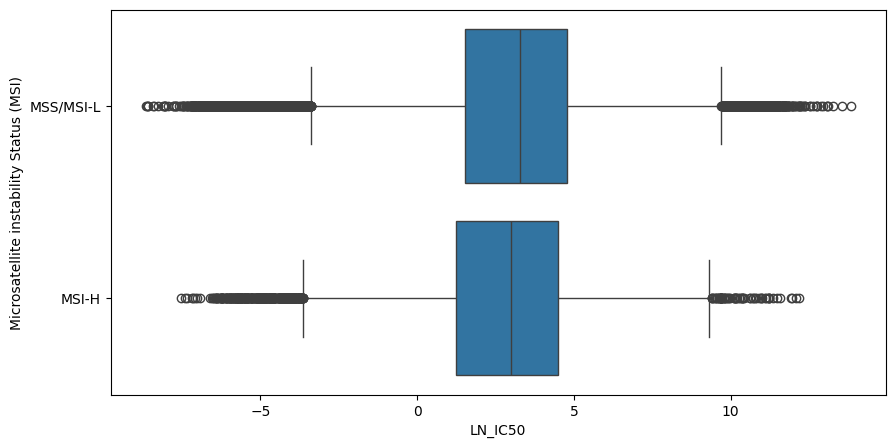

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x = y_train, y = X_train['Microsatellite instability Status (MSI)'])

<Axes: xlabel='LN_IC50', ylabel='Screen Medium'>

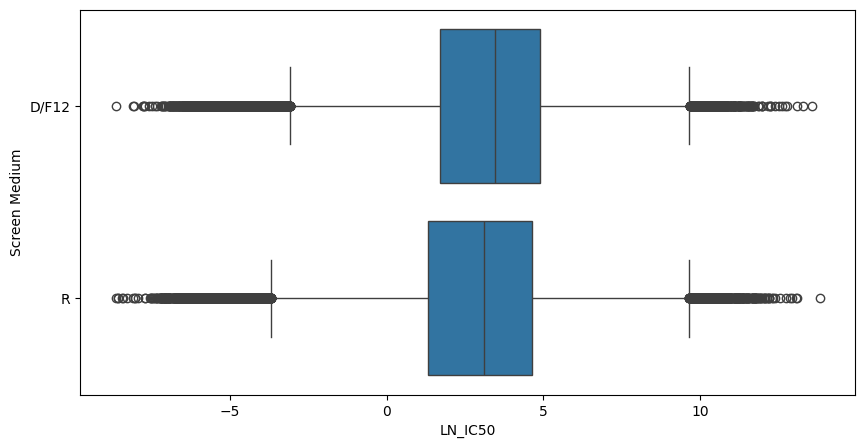

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x = y_train, y = X_train['Screen Medium'])

<Axes: xlabel='LN_IC50', ylabel='Growth Properties'>

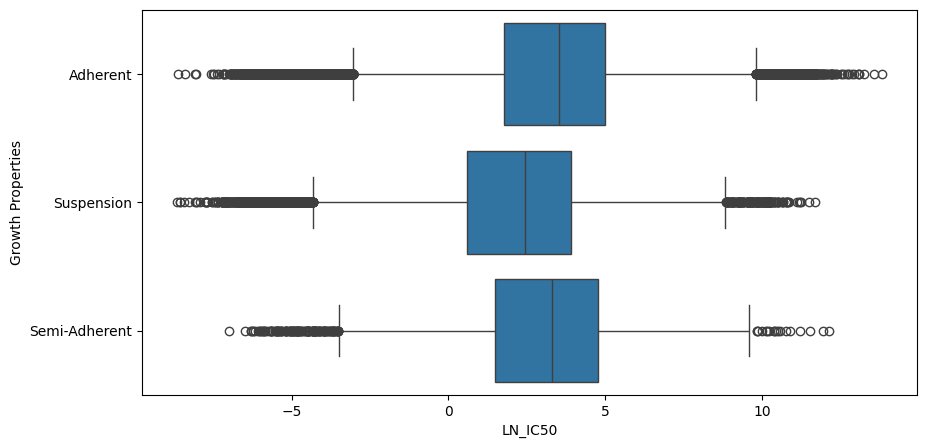

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x = y_train, y = X_train['Growth Properties'])

<Axes: xlabel='LN_IC50', ylabel='CNA'>

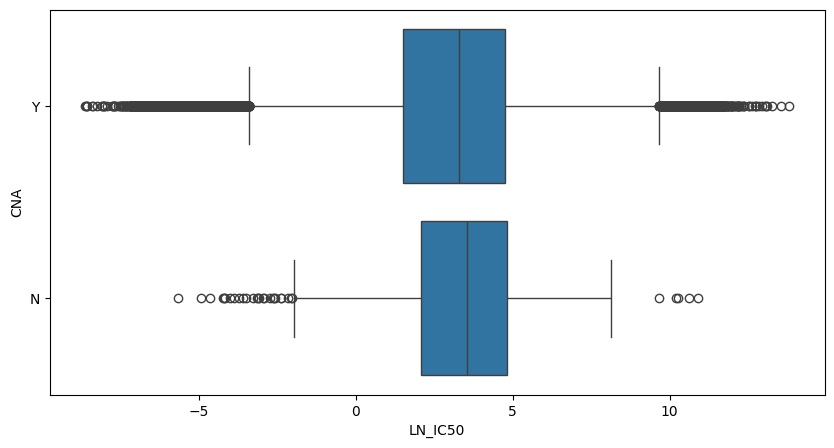

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x = y_train, y = X_train['CNA'])

<Axes: xlabel='LN_IC50', ylabel='Gene Expression'>

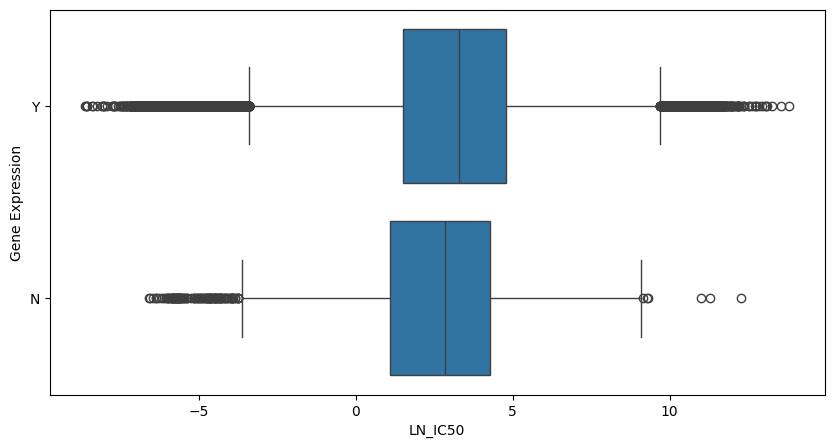

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x = y_train, y = X_train['Gene Expression'])

<Axes: xlabel='LN_IC50', ylabel='Methylation'>

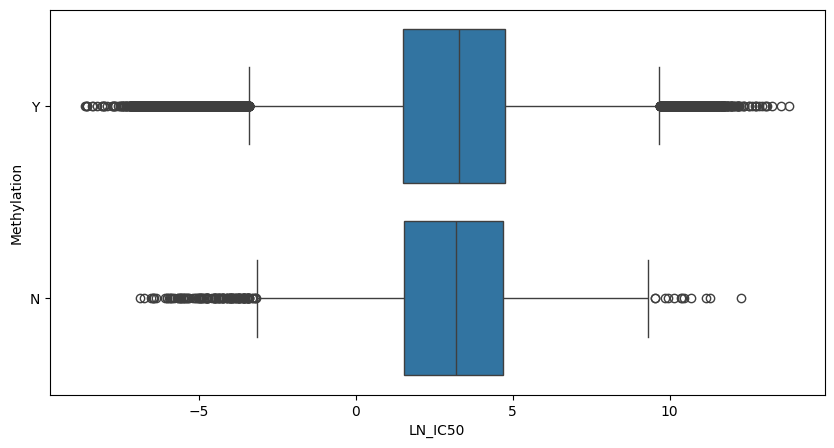

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x = y_train, y = X_train['Methylation'])

In [ ]:
plt.figure(figsize=(7, 50))
sns.boxplot(x = y_train, y = X_train['DRUG_NAME'])

<Axes: xlabel='LN_IC50', ylabel='TARGET'>

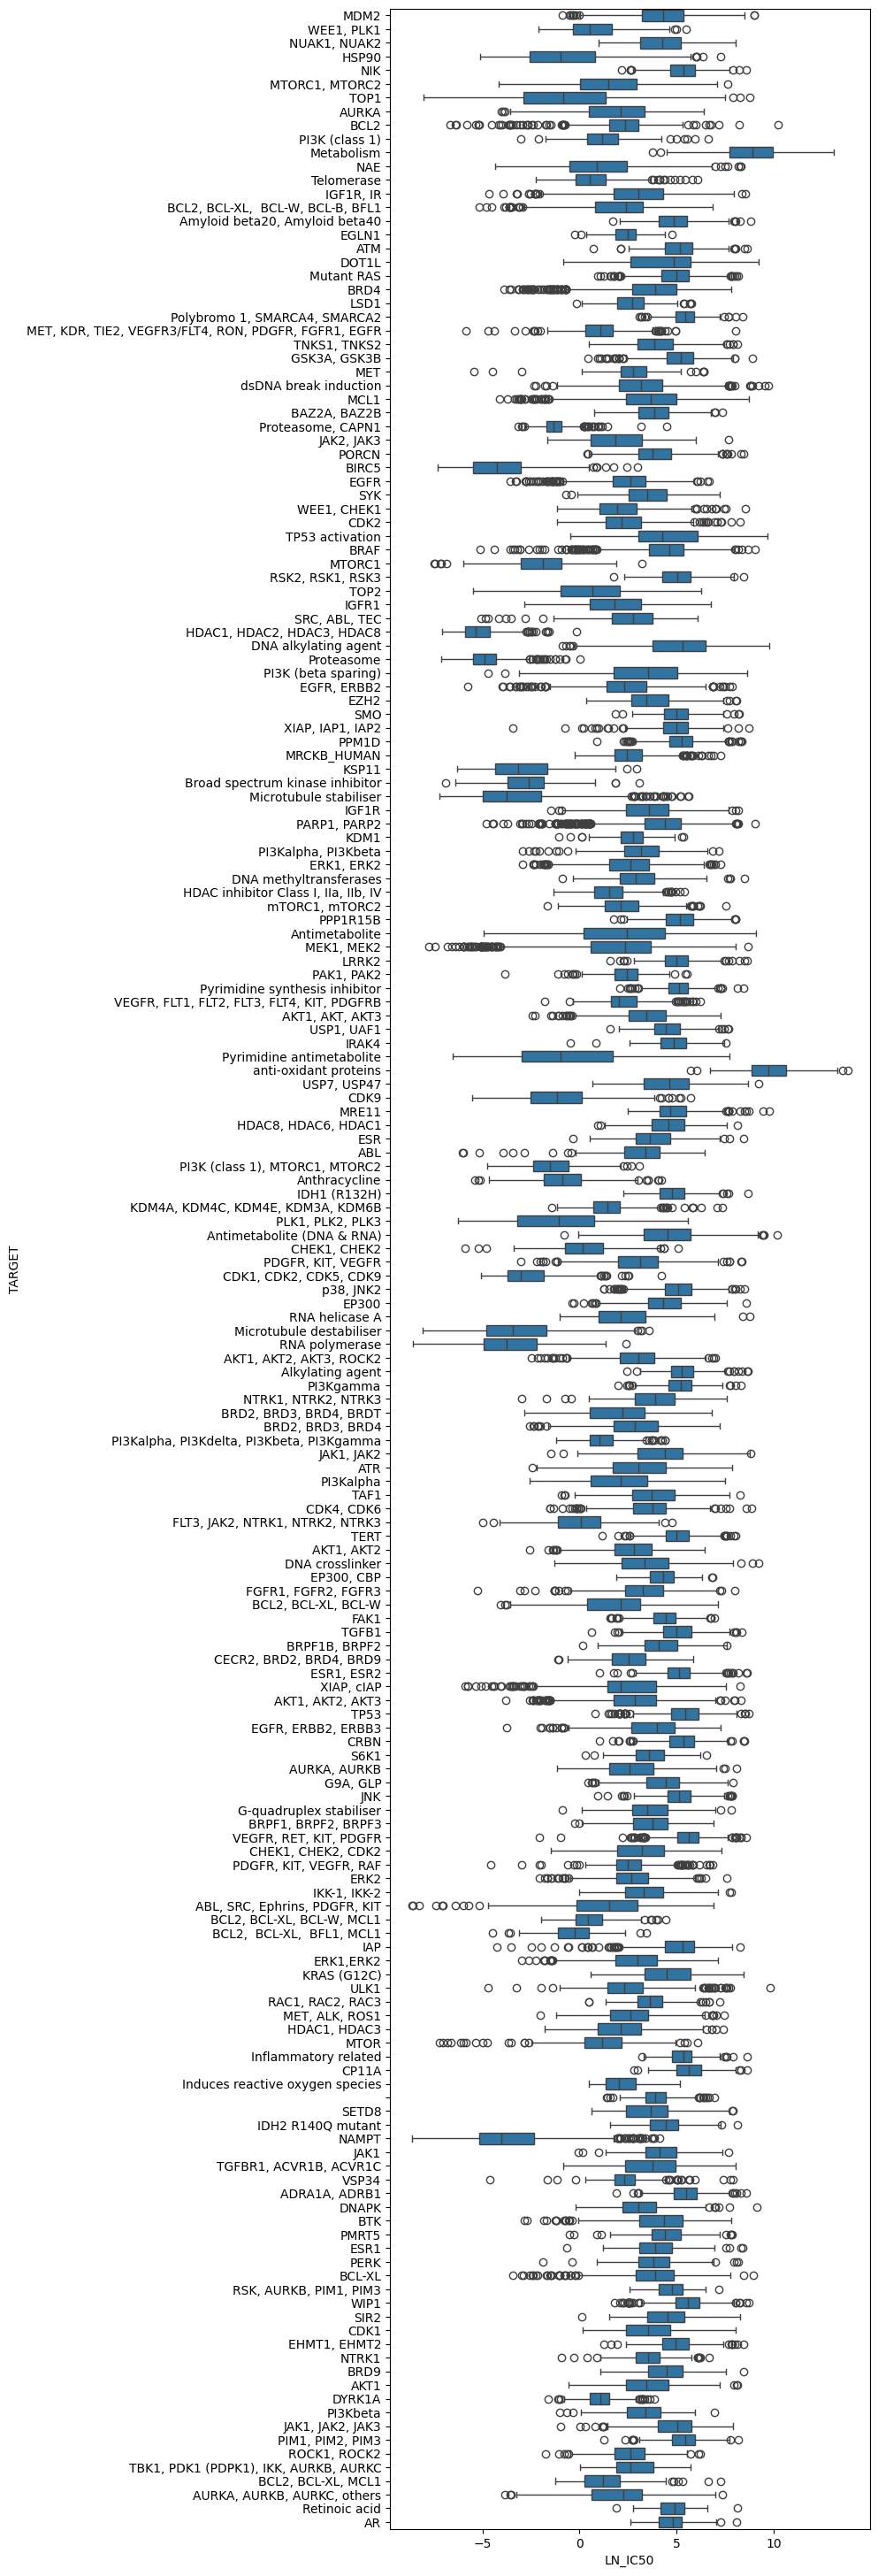

In [ ]:
plt.figure(figsize=(7, 37))
sns.boxplot(x = y_train, y = X_train['TARGET'])

<Axes: xlabel='LN_IC50', ylabel='TARGET_PATHWAY'>

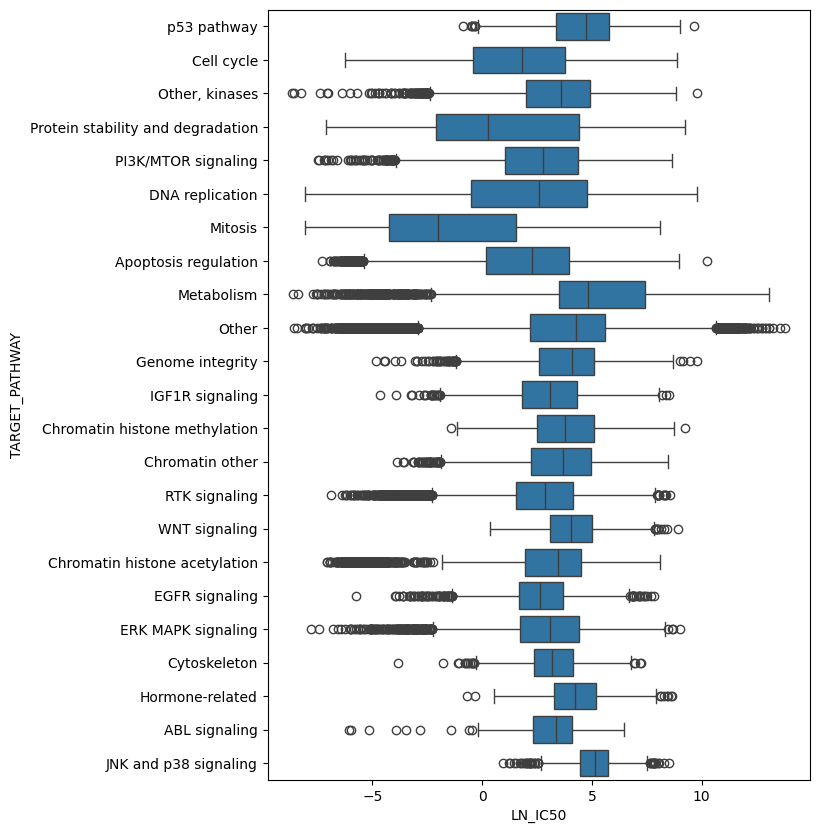

In [ ]:
plt.figure(figsize=(7, 10))
sns.boxplot(x = y_train, y = X_train['TARGET_PATHWAY'])